In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import math

# 1. load dataset

In [38]:

url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


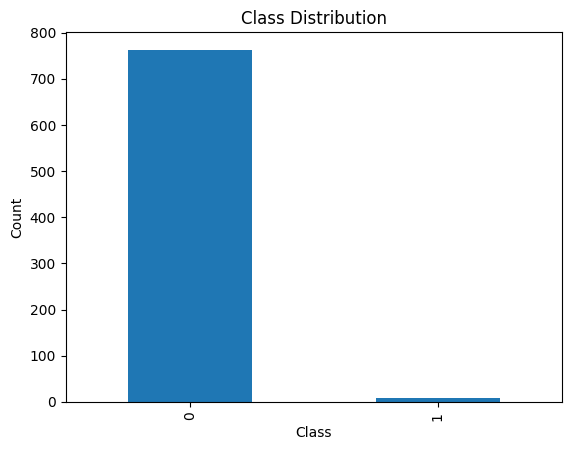

In [40]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 2. Balance the dataset (using SMOTE)

In [41]:
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

X_balanced, y_balanced = pipeline.fit_resample(X, y)
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

Class
0    76
1    76
Name: count, dtype: int64


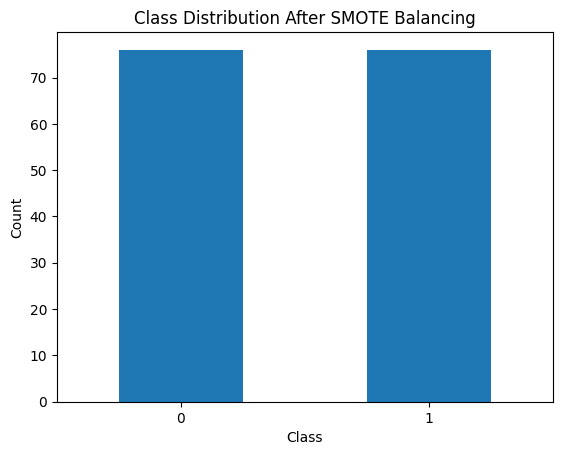

In [42]:
class_counts = df_balanced['Class'].value_counts()

print(class_counts)

# Bar plot
class_counts.plot(kind='bar')
plt.title("Class Distribution After SMOTE Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-4053929437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette='viridis')
/tmp/ipython-input-4053929437.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, ax=axes[1], palette='magma')


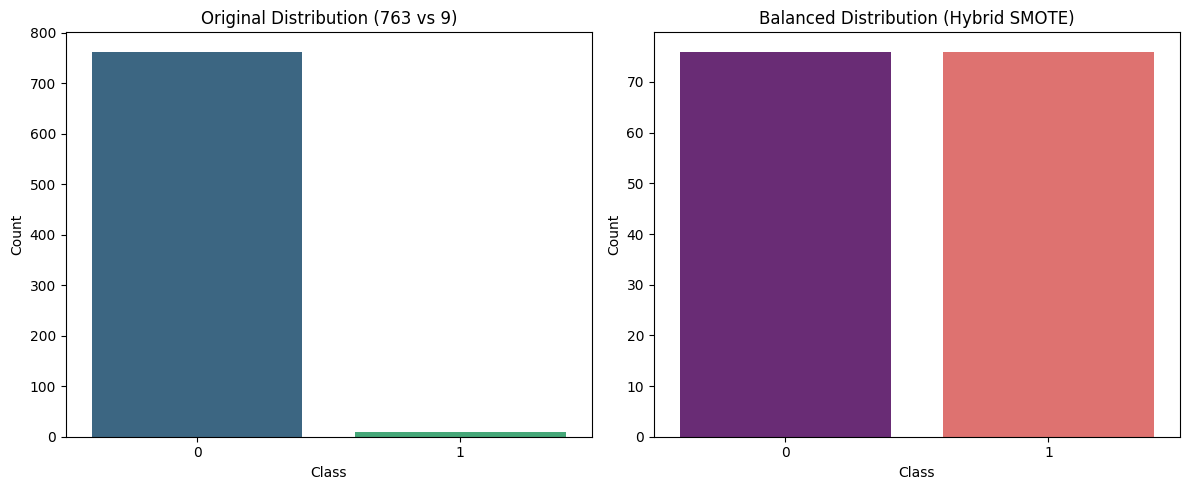

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Original Imbalanced Data
sns.countplot(x=y, ax=axes[0], palette='viridis')
axes[0].set_title('Original Distribution (763 vs 9)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot 2: Balanced Data after Hybrid Sampling
sns.countplot(x=y_balanced, ax=axes[1], palette='magma')
axes[1].set_title('Balanced Distribution (Hybrid SMOTE)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 3. DETERMINE SAMPLE SIZE

In [44]:
# n = (Z^2 * p * q) / e^2
z = 1.96  # 95% Confidence Level
p = 0.5   # Estimated proportion
e = 0.05  # 5% Margin of Error
n = math.ceil((z**2 * p * (1-p)) / (e**2))

# 4. CREATE FIVE SAMPLES


In [45]:
import random

samples = {}
# Sampling 1: Simple Random Sampling
samples['SimpleRandom'] = df_balanced.sample(n=n, random_state=1, replace=True)

# Sampling 2: Systematic Sampling
N = len(df_balanced)
start_index = random.randint(0, N - 1)
step = max(1, N // n)

systematic_indices = []
current_index = start_index
for _ in range(n):
    systematic_indices.append(current_index)
    current_index = (current_index + step) % N

samples['Systematic'] = df_balanced.iloc[systematic_indices].reset_index(drop=True)

# Sampling 3: Stratified Sampling
samples['Stratified'] = df_balanced.groupby('Class', group_keys=False).apply(lambda x: x.sample(n // 2, random_state=3, replace=True))

# Sampling 4: Cluster Sampling
samples['Cluster'] = df_balanced.sample(n=n, random_state=42, replace=True)

# Sampling 5: Convenience/Bootstrap Sampling (already uses replace=True)
samples['Bootstrap'] = df_balanced.sample(n=n, replace=True, random_state=5)

/tmp/ipython-input-2292774293.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples['Stratified'] = df_balanced.groupby('Class', group_keys=False).apply(lambda x: x.sample(n // 2, random_state=3, replace=True))


In [46]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": SVC(),
    "M5": ExtraTreesClassifier()
}

In [50]:
# 4. Evaluate
results = pd.DataFrame(index=models.keys(), columns=samples.keys())

for s_name, s_data in samples.items():
    X_s = s_data.drop('Class', axis=1)
    y_s = s_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

    for m_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.loc[m_name, s_name] = accuracy_score(y_test, y_pred) * 100

print(results)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   SimpleRandom Systematic Stratified    Cluster  Bootstrap
M1    94.805195   89.61039  92.207792  96.103896  97.402597
M2        100.0      100.0      100.0  97.402597  97.402597
M3        100.0  97.402597      100.0      100.0      100.0
M4    63.636364  57.142857  63.636364  67.532468  72.727273
M5        100.0  97.402597  98.701299      100.0      100.0
